# Clustering Challenge

Clustering is an *unsupervised* machine learning technique in which you train a model to group similar entities into clusters based on their features.

In this exercise, you must separate a dataset consisting of three numeric features (**A**, **B**, and **C**) into clusters. Run the cell below to load the data.

In [23]:
import pandas as pd

data = pd.read_csv('data/clusters.csv')
data.head()

,A,B,C
0,-0.087492,0.398000,0.014275
1,-1.071705,-0.546473,0.072424
2,2.747075,2.012649,3.083964
3,3.217913,2.213772,4.260312
4,-0.607273,0.793914,-0.516091


Your challenge is to identify the number of discrete clusters present in the data, and create a clustering model that separates the data into that number of clusters. You should also visualize the clusters to evaluate the level of separation achieved by your model.

Add markdown and code cells as required to create your solution.

> **Note**: There is no single "correct" solution. A sample solution is provided in [04 - Clustering Solution.ipynb](04%20-%20Clustering%20Solution.ipynb).

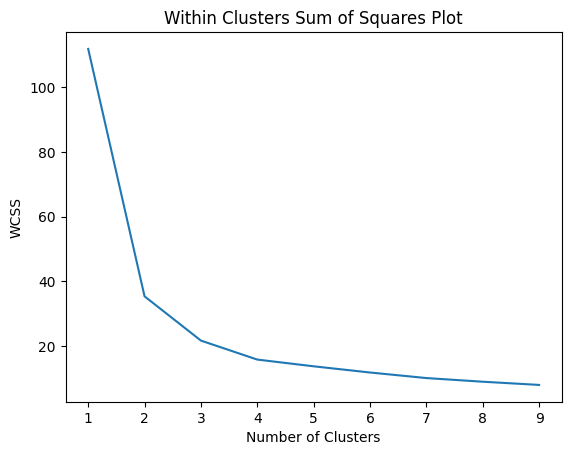

In [24]:
# Your code to create a clustering solution
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


scaled_features = MinMaxScaler().fit_transform(data)
pca = PCA(n_components = 2).fit(scaled_features)
features_2d = pca.transform(scaled_features)
wcss = []
for i in range(1,10):
    kmeans = KMeans(n_clusters=i, n_init=100)
    kmeans.fit(features_2d)
    wcss.append(kmeans.inertia_)
wcss

plt.plot(range(1,10),wcss)
plt.ylabel('WCSS')
plt.xlabel('Number of Clusters')
plt.xticks(range(1,10))
plt.title('Within Clusters Sum of Squares Plot')
plt.show()
# We already knew that we needed to create three clusters from the question prompt, but this plot confirms that
# the ideal number of clusters is between 2 and 3. 

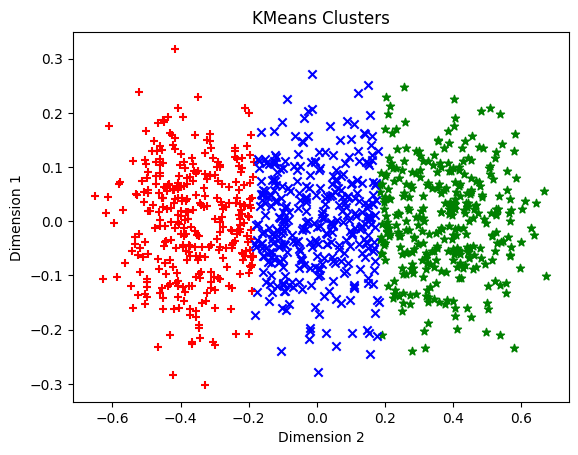

In [31]:
kmeans = KMeans(n_clusters=3,n_init=100,init='k-means++',max_iter=1000)
km_clusters = kmeans.fit_predict(features_2d)

# Now we want to identify the points and their respective clusters
def plot_clusters(data, km_clusters,title='Cluster Diagram'):
    color_dic = ['red','green','blue']
    marker_dic = ['+',"*",'x']

    colors = [color_dic[i] for i in km_clusters]
    markers = [marker_dic[i] for i in km_clusters]

    for idx in range(len(km_clusters)):
        plt.scatter(data[idx][0],data[idx][1],color=colors[idx],marker = markers[idx])

    plt.title(title)
    plt.xlabel('Dimension 2')
    plt.ylabel('Dimension 1')
plot_clusters(features_2d,km_clusters, 'KMeans Clusters')

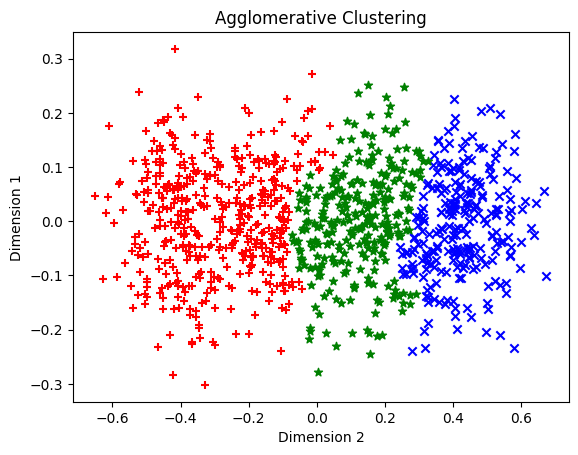

In [33]:
from sklearn.cluster import AgglomerativeClustering

agg_model = AgglomerativeClustering(n_clusters=3)
agg_clusters = agg_model.fit_predict(features_2d)
plot_clusters(features_2d, agg_clusters,'Agglomerative Clustering')